## Lab 3

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings('ignore')

### 1 - Wine: monthly-australian-wine-sales

In [3]:
# 1.1 Loading the data set
wine_csv = pd.read_csv("~/Desktop/P174/monthly-australian-wine-sales-th.csv", header = None, skiprows = 1, nrows = 187)

col_names = ['Month','Sales']
wine_csv.columns = col_names
wine_csv.head()

,Month,Sales
0,1980-01,464
1,1980-02,675
2,1980-03,703
3,1980-04,887
4,1980-05,1139


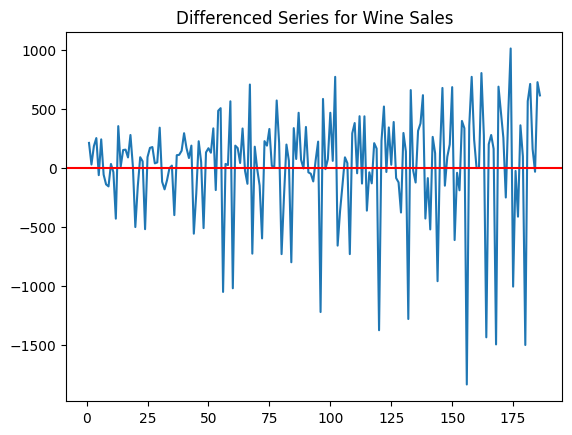

In [ ]:
# 1.2 Questions
# 1. Sample Differencing
wine_diff = wine_csv['Sales'].diff().dropna()

plt.plot(wine_diff)
plt.axhline(0, color = 'red')
plt.title("Differenced Series for Wine Sales")
plt.show()

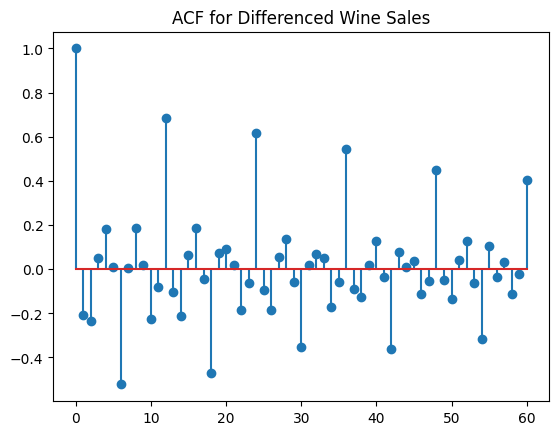

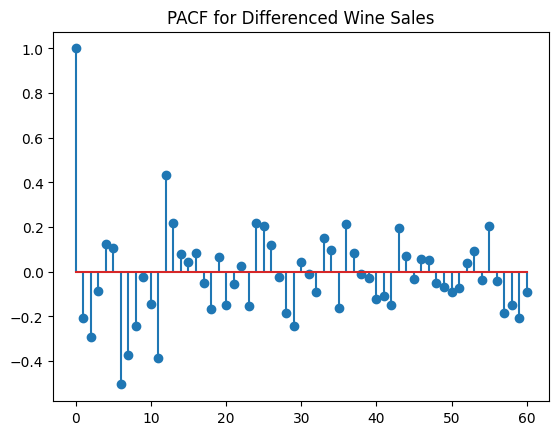

In [9]:
# 2. ACF and PACF
wine_diff_acf = acf(wine_diff, nlags = 60)
wine_diff_pacf = pacf(wine_diff, nlags = 60)

plt.stem(wine_diff_acf)
plt.title("ACF for Differenced Wine Sales")
plt.show()

plt.stem(wine_diff_pacf)
plt.title("PACF for Differenced Wine Sales")
plt.show()

The plot for the PACF doesn't show any significant patterns for the differenced model, but the ACF does repeat values with a period of about eight lags. This pattern suggests there's still some trend/seasonality in the differenced series.

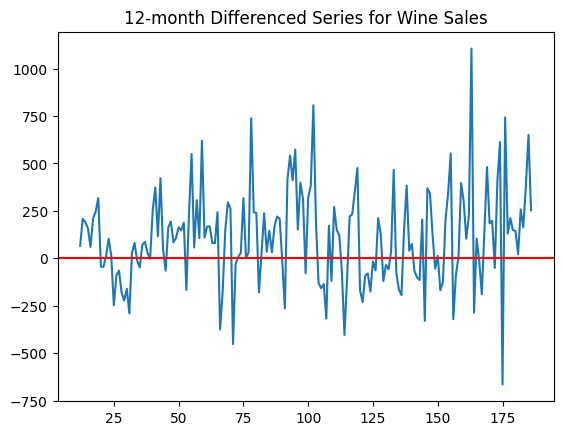

In [10]:
# 3. 12-step differenced series
wine_diff = wine_csv['Sales'].diff(periods = 12).dropna()

plt.plot(wine_diff)
plt.axhline(0, color = 'red')
plt.title("12-month Differenced Series for Wine Sales")
plt.show()

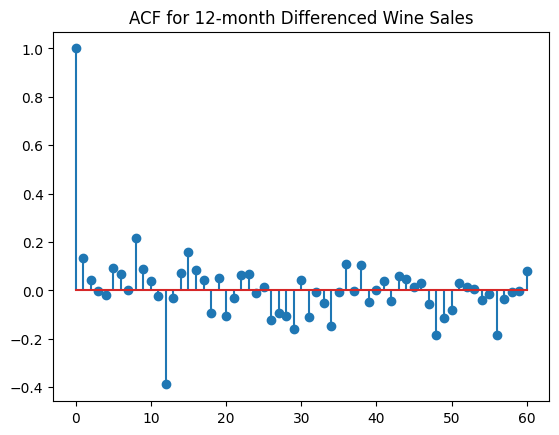

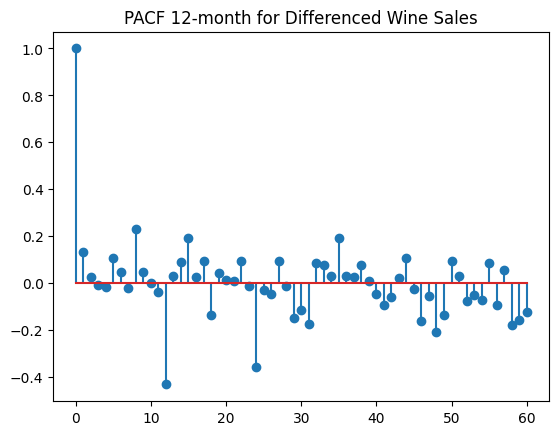

In [11]:
# 3. ACF and PACF for new differenced series
wine_diff_acf = acf(wine_diff, nlags = 60)
wine_diff_pacf = pacf(wine_diff, nlags = 60)

plt.stem(wine_diff_acf)
plt.title("ACF for 12-month Differenced Wine Sales")
plt.show()

plt.stem(wine_diff_pacf)
plt.title("PACF 12-month for Differenced Wine Sales")
plt.show()

### 2 Modeling GNP

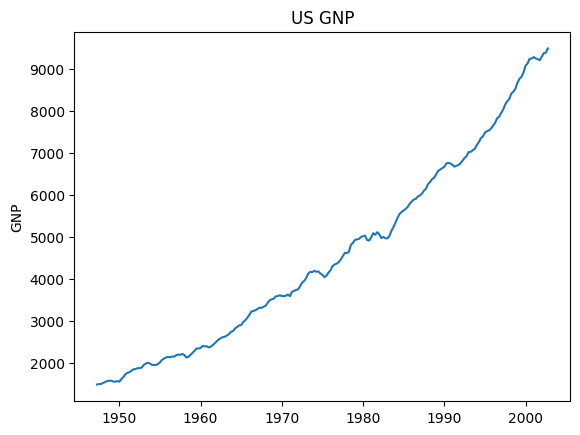

In [3]:
# 1. plotting gnp data
gnp = pd.read_csv("gnp_data.csv") # exported from R

start = '1947-01'
date_range = pd.date_range(start = start, periods = len(gnp), freq = 'Q')
gnp['Date'] = date_range
gnp.set_index('Date', inplace = True)
gnp = gnp.drop(columns = ['Year'])

gnp.head()

plt.plot(gnp['GNP'])
plt.title("US GNP")
plt.ylabel("GNP")
plt.show()

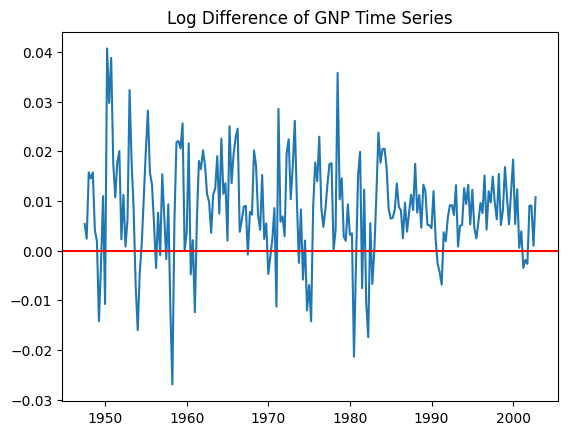

In [6]:
# 2. log differencing the data
gnp_log = np.log(gnp['GNP'])
gnp_log_diff = gnp_log.diff().dropna()

plt.plot(gnp_log_diff)
plt.axhline(0, color = 'red')
plt.title('Log Difference of GNP Time Series')
plt.show()

There still appears to be some repition in the graph, so the time series doesn't appear to be stationary.

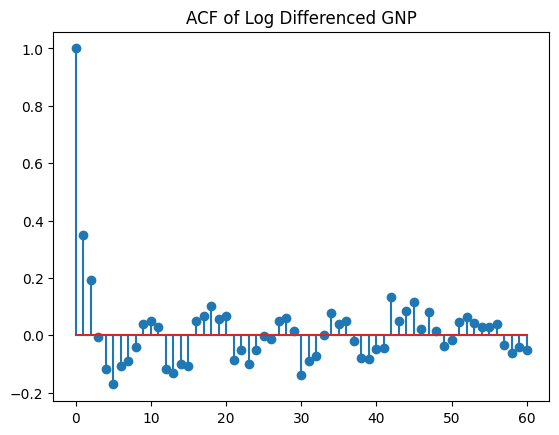

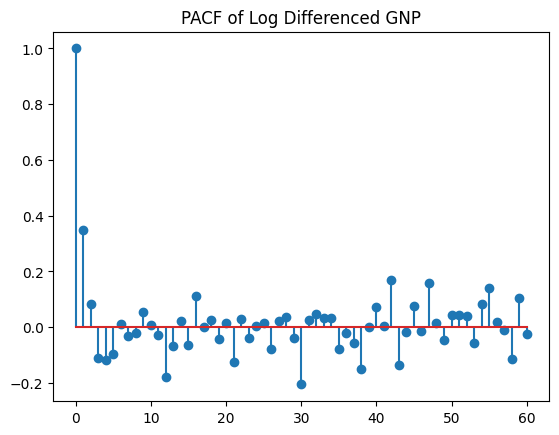

In [ ]:
# 3. acf and pacf of the log differenced data
gnp_log_diff_acf = acf(gnp_log_diff, nlags = 60)
gnp_log_diff_pacf = pacf(gnp_log_diff, nlags = 60)

plt.stem(gnp_log_diff_acf)
plt.title('ACF of Log Differenced GNP')
plt.show()

plt.stem(gnp_log_diff_pacf)
plt.title('PACF of Log Differenced GNP')
plt.show()

In [12]:
# 4. fit an MA(2) model
ma_model = ARIMA(gnp_log_diff, order = (0,0,2))
ma_result = ma_model.fit()
ma_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GNP   No. Observations:                  222
Model:                 ARIMA(0, 0, 2)   Log Likelihood                 719.908
Date:                Wed, 06 Nov 2024   AIC                          -1431.816
Time:                        14:23:40   BIC                          -1418.206
Sample:                    06-30-1947   HQIC                         -1426.321
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.001      8.389      0.000       0.006       0.010
ma.L1          0.3067      0.054      5.649      0.000       0.200       0.413
ma.L2          0.2249      0.056      4.028      0.000       0.115       0.334
sigma2       8.92e-05   6.49e-06     13.752      0.000    7.65e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.03   Jarque-Bera (JB):                21.82
Prob(Q):                              0.86   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.13
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The approximate values for $\theta_1$ and $\theta_2$ are 0.3067 and 0.2249 respectively. 

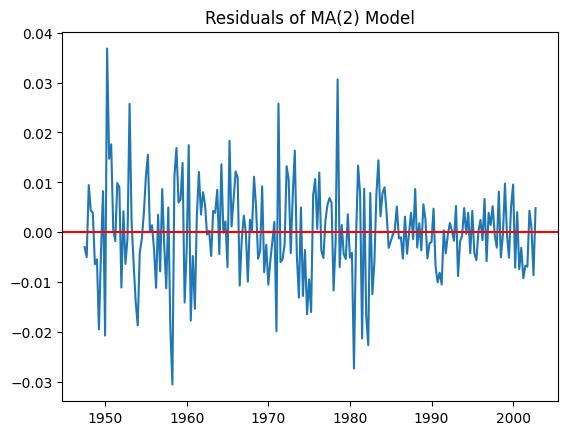

In [ ]:
# 5. plotting residuals for ma_model
plt.plot(ma_result.resid)
plt.axhline(0, color = 'red')
plt.title('Residuals of MA(2) Model')
plt.show()

Most of the residuals for the model are small, with a few outlying values. The plot of the residuals suggests the model is a good fit.

In [13]:
# making an AR(2) model
ar_model = ARIMA(gnp_log_diff, order = (2,0,0))
ar_result = ar_model.fit()
ar_result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    GNP   No. Observations:                  222
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 719.362
Date:                Wed, 06 Nov 2024   AIC                          -1430.723
Time:                        14:24:09   BIC                          -1417.113
Sample:                    06-30-1947   HQIC                         -1425.228
                         - 09-30-2002                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0083      0.001      7.553      0.000       0.006       0.010
ar.L1          0.3186      0.057      5.621      0.000       0.208       0.430
ar.L2          0.0826      0.059      1.389      0.165      -0.034       0.199
sigma2      8.965e-05   6.56e-06     13.665      0.000    7.68e-05       0.000
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                21.48
Prob(Q):                              0.88   Prob(JB):                         0.00
Heteroskedasticity (H):               0.19   Skew:                             0.16
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.49
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

The approximate values for $\phi_1$ and $\phi_2$ are 0.3186 and 0.0826 respectively. 

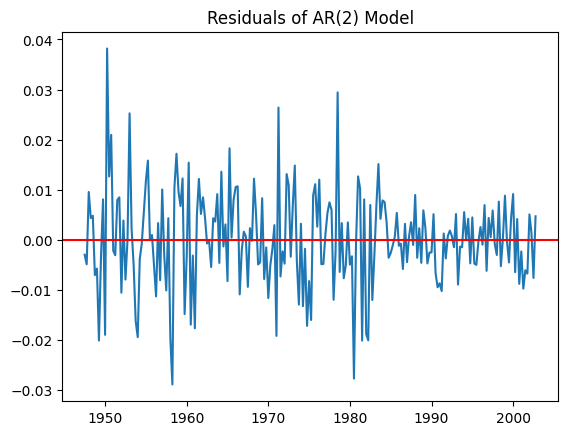

In [14]:
# plotting ar_model residuals 
plt.plot(ar_result.resid)
plt.axhline(0, color = 'red')
plt.title('Residuals of AR(2) Model')
plt.show()

The residuals for the AR(2) appear to be larger than those for the MA(2), which suggests the MA(2) is a better fit for the data.

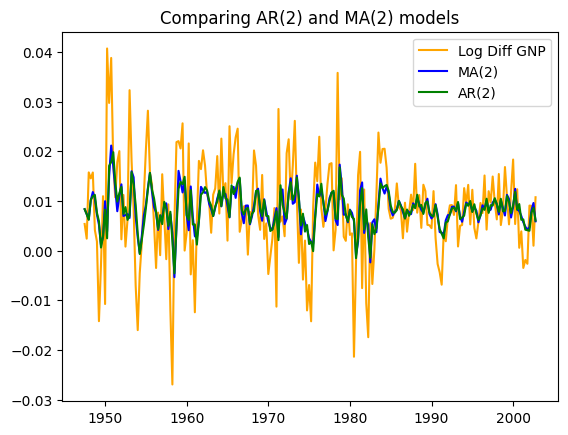

In [28]:
# 6. plotting to compare AR(2) and MA(2) models with log diff data 
plt.plot(gnp_log_diff, color = 'orange', label = 'Log Diff GNP')
plt.plot(ma_result.fittedvalues, color = 'blue', label = 'MA(2)')
plt.plot(ar_result.fittedvalues, color = 'green', label = 'AR(2)')
plt.title("Comparing AR(2) and MA(2) models")
plt.legend()
plt.show()